<h1>Use of Samples of Different Classes of Iris Plants for Their Population Inference</h1>

<h2>Introduction</h2>

Variation within species can be a result of a myriad of reasons including genetic mutations, recombination, and immigration of genes. Oftentimes these variations are noticeably significant (like stark differences in the haircolor of fraternal twins), but sometimes they are more subtle (lactose intolerance). Diving into this question a little further, this group wishes to explore the variation within different classes of the same flower species, namely the Iris flower. The chosen dataset contains 50 samples of three species of Iris (Iris Setosa, Iris Virginica and Iris Versicolor) [1]. We have information about the sepal length, sepal width, petal length, and petal width (in cm) for all three classes. For this project we decided to focus on the sepal lengths and from the information given in the dataset, we began by gathering the following information (See Table 1) <br>

Differences in the mean sepal lengths of classes of flowers from the same species piqued our interest. Therefore, we decided to explore whether these differences are statistically significant or just due to sampling variation.<br>

Precisely, the question we shall aim to answer is: <b>Do Iris Setosa, Iris Virginica, and Iris Versicolor have the same mean sepal length?</b><br>

Expanding on the above:<br>

Suppose the following:<br>

S1 = true mean sepal length of Iris Setosa<br>
S2 = true mean sepal length of Iris Virginica <br>
S3 = true mean sepal length of Iris Versicolor<br>

We want to check if the null hypothesis of S1 = S2 = S3 holds true.<br>

As indicated above, the location parameter we have chosen to answer our question is the mean. This is because initial exploratory analysis of the dataset revealed that the sepal lengths for all three classes of Iris species were normally distributed. Additionally, the sample size of 50 is large enough for the Central Limit Theorem to apply, thereby making it reasonable to assume that sample means shall be normally distributed. For the same reason, we have chosen standard deviation to be our scale parameter. We shall use information obtained during exploratory analysis (sample mean and sample standard deviation) to test our hypothesis by performing a one way ANOVA test. <br>
 
Following are the assumptions made while conducting a one-way ANOVA test:<br>

1. The samples should be taken from normally distributed populations
2. Each sample has been drawn independently of other samples
3. Variance of data in the different groups should be the same
4. The dependent variable (here sepal length) should be continuous. 

Given the features of our dataset and exploratory data analysis, all these assumptions are reasonable to make. Therefore, it is appropriate to conduct a one-way ANOVA test to answer the proposed question.



<h2>
Methods
</h2>

In order to test our inferential question, we want to formulate a null hypothesis and an alternate hypothesis. Our null hypothesis states that the true mean sepal length of Iris Setosa (S1) is equal to that of Iris Versicolor (S2) which is also equal to that of Iris Virginica (S2). This can be represented with the following:<br>

H0 : S1 = S2 = S3<br>

To test if the null hypothesis is true, we would look at the test statistics for ANOVA testing, namely the F-test statistic. This can be done by using the aov function in R, where the f-test statistic and the p-value will be presented. By analyzing the p-value, we would then be able to make a conclusion on whether or not we have enough evidence to reject the null hypothesis. If statistics show that the null hypothesis should be rejected, we would be able to infer that at least one group has a different true mean sepal length than the other two. To further analyze, we may use t-test to compare between each group. In that case, we would have three null hypotheses to test:<br>

H0 : S1 = S2<br>
H0 : S2 = S3<br>
H0 : S3 = S4<br>

From testing each of these hypotheses, we can decide whether the true mean sepal length of three Iris species are different from each other. 

 


<h2>
Exploratory Data Analysis 
</h2>

In [1]:
# Load libraries
library(tidyverse)
library(repr)
library(scales)
library(broom)
library(infer)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
# Loading the Dataset and treat class as a factor
url = "https://raw.githubusercontent.com/fulleraltamiranoe/stat-201-project/main/iris.csv"
iris_data <- read_csv(url) %>% 
    mutate(class = as_factor(class)) 

# statistics of interest
iris_param <- iris_data %>%
    group_by(class) %>%
    summarize(mean_sepal = mean(sepal_length), sd_sepal = sd(sepal_length), var_sepal = var(sepal_length))

# visualization of sample means
options(repr.plot.width = 10, repr.plot.height = 8)
box <- iris_data %>%
    ggplot(aes(x=class, y=sepal_length)) +
    geom_boxplot(aes(class, sepal_length, fill = class))+
    geom_jitter()+
    labs(x = 'Class', y = 'Sepal Length [cm]')+
    ggtitle('Figure I: Boxplot of the Sepal Length of three different classes of Iris (n=50 for each)')+
    theme(text = element_text(size = 12), plot.title = element_text(hjust = 0.5))

# ANOVA to see if they are all the same
anova <- aov(sepal_length~class, data=iris_data) %>% 
    tidy()

f_stat = anova$statistic[1]

p_val = anova$p.value[1]

anova_results <- tibble(f_stat, p_val)

# conclusion so far: at least one of them is different

# next question: which one is different?
# test 1: setosa vs versicolor

setosa_mean = iris_param$mean_sepal[1]
setosa_sd = iris_param$sd_sepal[1]
versicolor_mean = iris_param$mean_sepal[2]
versicolor_sd = iris_param$sd_sepal[2]
virginica_mean = iris_param$mean_sepal[3]
virginica_sd = iris_param$sd_sepal[3]

# test 1: setosa vs versicolor
t_1 = (setosa_mean-versicolor_mean)/sqrt((((setosa_sd)^2)/50)+(((versicolor_sd)^2)/50))
p_val1 = pt(t_1, df=49)*2 
# conclusion: setosa sepal != versicolor sepal at every confidence level we care about

# test 2: setosa vs virginica
t_2 = (setosa_mean-virginica_mean)/sqrt((((setosa_sd)^2)/50)+(((virginica_sd)^2)/50))
p_val2 = pt(t_2, df=49)*2 
# conclusion: setosa sepal != virginica sepal at every confidence level we care about

# test 3: versicolor vs virginica
t_3 = (versicolor_mean-virginica_mean)/sqrt((((versicolor_sd)^2)/50)+(((virginica_sd)^2)/50))
p_val3 = pt(t_3, df=49) *2
# conclusion: versicolor != verginica at any confidence level we care about

summary_results <- tibble(t_1, p_val1, t_2, p_val2, t_3, p_val3)

Rows: 150 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): class
dbl (4): sepal_length, sepal_width, petal_length, petal_width


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



<h4>Table 1: Average sepal length in cm, standard deviation and variance of a Sample of 50 each iris setosa, iris versicolor, and iris virginical plants</h4>

In [3]:
iris_param

class,mean_sepal,sd_sepal,var_sepal
<fct>,<dbl>,<dbl>,<dbl>
Iris-setosa,5.006,0.3524897,0.1242490
Iris-versicolor,5.936,0.5161711,0.2664327
Iris-virginica,6.588,0.6358796,0.4043429


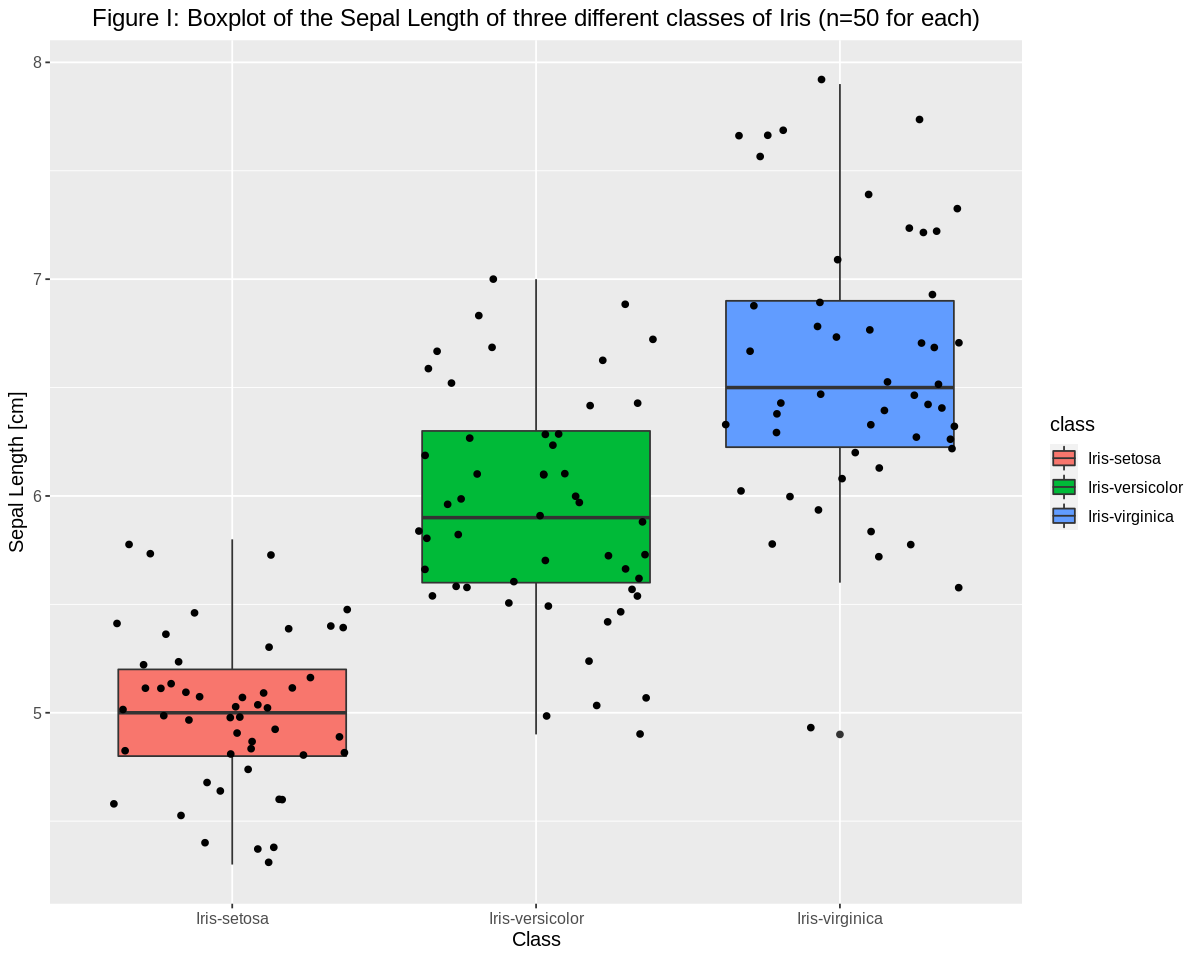

In [4]:
box

<h4>Table 2: ANOVA test results</h4>

In [5]:
anova_results

f_stat,p_val
<dbl>,<dbl>
119.2645,1.669669e-31


<h4>Table 3: t-test results (test 1: I. setosa to I. versicolor, test 2: I. setosa to I. virginica, test 3: I. virginica to I. versicolor)</h4>

In [6]:
summary_results

t_1,p_val1,t_2,p_val2,t_3,p_val3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-10.52099,3.63027e-14,-15.3862,2.149958e-20,-5.629165,8.675813e-07


<h2>
Results
</h2>
The null hypothesis for the ANOVA test states that the true mean sepal lengths from the three different subspecies of Iris are the same. The F-statistic under the null-model is 119.26 which gives a p value of 1.67e-31. A series of three 2-sample t-tests were performed to determine which pairs of plants are different. The null hypothesis for each of the t-tests is that the two species have the same true mean sepal length. The p values for the comparison of Iris Setosa and Iris Versicolor, Iris Setosa and Iris Virginica, and Iris Versicolor and Iris virginica, were 3.63e-14, 2.15e-14, and 8.68e-7, respectively.<br><br>


Because the ANOVA f-statistic is well approximated by an F-distribution if our assumptions hold true, bootstrapping is not necessary. Since the comparison of sepal length is all we are interested in, ANOVA test is all that is needed to test whether or not they are significantly different, and the t-tests allow us to determine which combination of the classes is different. Both ANOVA and t-test approximate a F and t-distribution respectively, asymtoptics is sufficient to determine to answer the question asked. The trustworthiness of this model depends on how close the distribution of the data is to a normal distribution.

<h2>
Discussion
</h2>

The initial ANOVA test indicated an f-statistic of 119.26 under the null model, leading to a p-value of 1.67e-31 of having said f-statistic at least as extreme. This suggests that the null hypothesis can be rejected and that at least one species of iris has different true mean sepal lengths at a 95% confidence level. This alone is not enough to indicate which, and if all are significantly different. The subsequent t-tests were used to determine this.<br>

Three two sample t-tests were conducted comparing the three classes of iris and their sepal lengths against each other. Based on the p-values obtained comparing I. setosa to I. versicolor (p = 3.63e-14) and to I. virginica (p = 2.15e-14), as well as when comparing I. versicolor to I. virginica (p = 8.68e-7), we can safely stat that the null hypothesis can be rejected and that all species have significantly different mean sepal lengths at the 95% confidence level.<br>

Figure I sets the expectation that at least within the samples gathered, I. setosa would be significantly different than the other two classes as the distribution of sepal lengths has little to no overlap with them. However, it is not so obvious when comparing I. versicolor and I.virginica as their distributions do overlap.<br>

In conclusion, this analysis has shown that these three classes of iris have statistically different sepal lengths and in the future this difference and how approximate the sepal length is to the sample mean shown here could be used as an initial identification tool before more expensive and involved methods are used. Ideally, this same analysis could be used with more classes of irises and if they are found to all be different, then the initial identification of the class of an iris could be as simple as measuring its sepal length.

<h2>
References
</h2>
    
    

1. Fisher, R. A. The Use of Multiple Measurements in Taxonomic Problems. Annals of Human Genetics, 1936

2. Ismay, Chester, and Kim, Albert Y. Statistical Inference via Data Science: A ModernDive into R and the Tidyverse. ModernDive, 2022